## Gerekli Kütüphanelerin import edilmesi

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Datasetin Yüklenmesi

In [16]:
from google.colab import files
uploaded = files.upload()

## Veri Setini İnceleme

In [17]:
df= pd.read_csv('Thyroid_Diff.csv')

print('--------------------Betimsel İstatistikler--------------------')

print(df.describe())

print('--------------------İlk Beş Veri--------------------')

print(df.head())

print('--------------------Boş Verilerin Sayısı--------------------')

print(df.isnull().sum())

print('--------------------Bilgi--------------------')

print(df.info())


--------------------Betimsel İstatistikler--------------------
          Age
count 383.000
mean   40.867
std    15.134
min    15.000
25%    29.000
50%    37.000
75%    51.000
max    82.000
--------------------İlk Beş Veri--------------------
   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function         Physical Examination  \
0   27      F      No         No              No        Euthyroid   Single nodular goiter-left   
1   34      F      No        Yes              No        Euthyroid          Multinodular goiter   
2   30      F      No         No              No        Euthyroid  Single nodular goiter-right   
3   62      F      No         No              No        Euthyroid  Single nodular goiter-right   
4   62      F      No         No              No        Euthyroid          Multinodular goiter   

  Adenopathy       Pathology     Focality Risk    T   N   M Stage       Response Recurred  
0         No  Micropapillary    Uni-Focal  Low  T1a  N0  M0     I  Indetermin

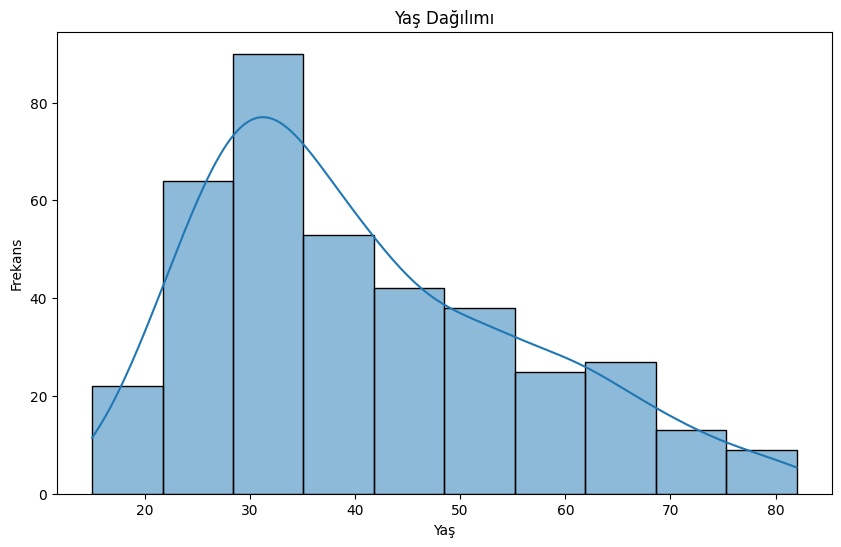

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

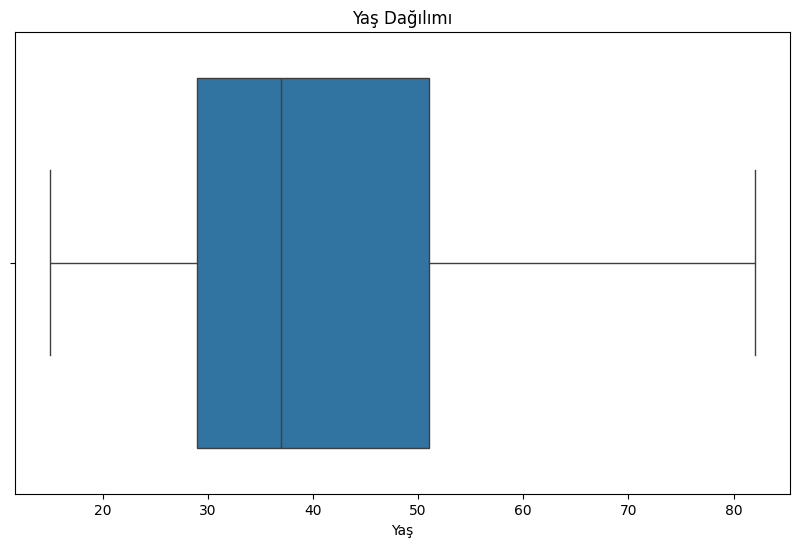

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.show()

## Variable Description

Age: The age of the patient at the time of diagnosis or treatment.


Gender: The gender of the patient (male or female).


Smoking: Whether the patient is a smoker or not.


Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).


Hx Radiotherapy: History of radiotherapy treatment for any condition.


Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.


Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.


Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.


Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).


Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.


T: Tumor classification based on its size and extent of invasion into nearby structures.


N: Nodal classification indicating the involvement of lymph nodes.


M: Metastasis classification indicating the presence or absence of distant metastases.


Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.


Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.


Recurred: Indicates whether the cancer has recurred after initial treatment.


## Univarite Variable Analysis

Categorical Variable : Country

Numerical Variable : Age

In [46]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n-------------------- Categoric --------------------")
    print(cat_cols)
    print("\n-------------------- Numeric --------------------")
    print(num_cols)
    print("\n-------------------- Categoric But Cardinal --------------------")
    print(cat_but_car)
    print("\n-------------------- Numeric But Categoric --------------------")
    print(num_but_cat)
    print("\n-------------------- Columns Overview --------------------")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [47]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)



-------------------- Categoric --------------------
['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

-------------------- Numeric --------------------
['Age']

-------------------- Categoric But Cardinal --------------------
[]

-------------------- Numeric But Categoric --------------------
[]

-------------------- Columns Overview --------------------
Observations: 383
Variables: 17
cat_cols: 16
num_cols: 1
cat_but_car: 0
num_but_cat: 0


        Gender  Ratio
Gender               
F          312 81.462
M           71 18.538


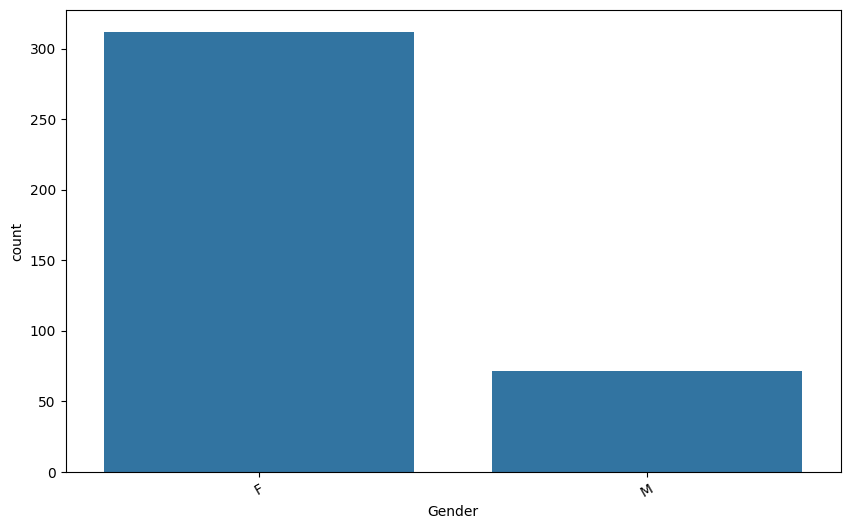

         Smoking  Ratio
Smoking                
No           334 87.206
Yes           49 12.794


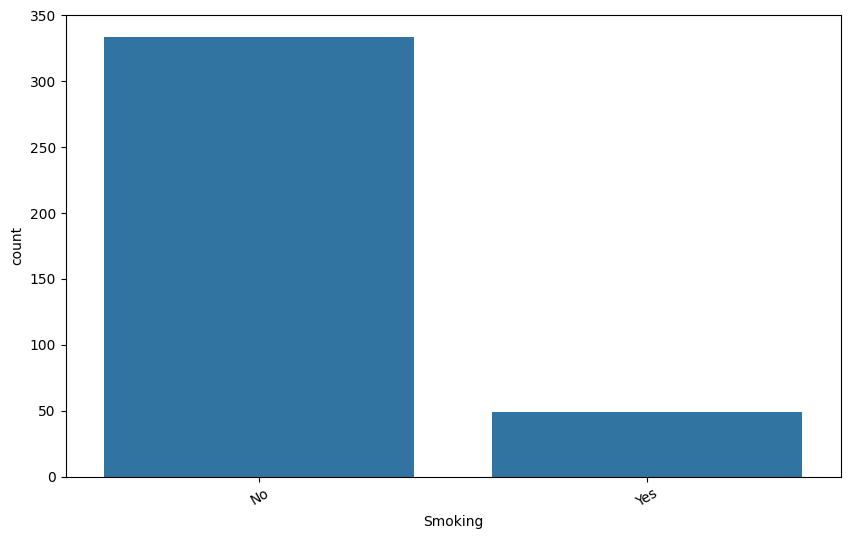

            Hx Smoking  Ratio
Hx Smoking                   
No                 355 92.689
Yes                 28  7.311


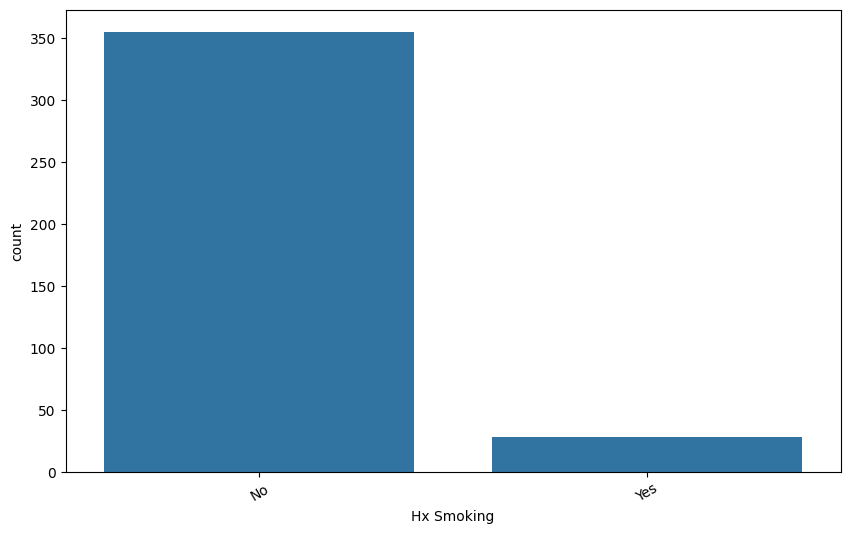

                 Hx Radiothreapy  Ratio
Hx Radiothreapy                        
No                           376 98.172
Yes                            7  1.828


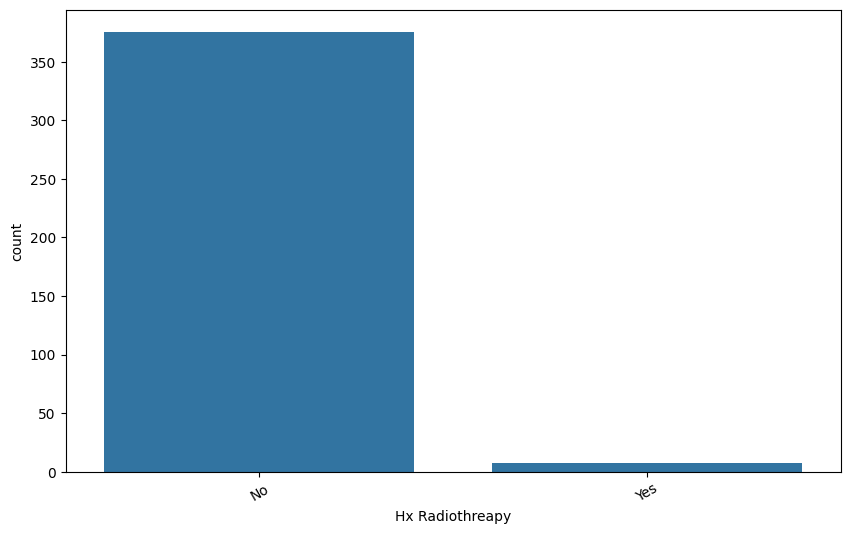

                             Thyroid Function  Ratio
Thyroid Function                                    
Euthyroid                                 332 86.684
Clinical Hyperthyroidism                   20  5.222
Subclinical Hypothyroidism                 14  3.655
Clinical Hypothyroidism                    12  3.133
Subclinical Hyperthyroidism                 5  1.305


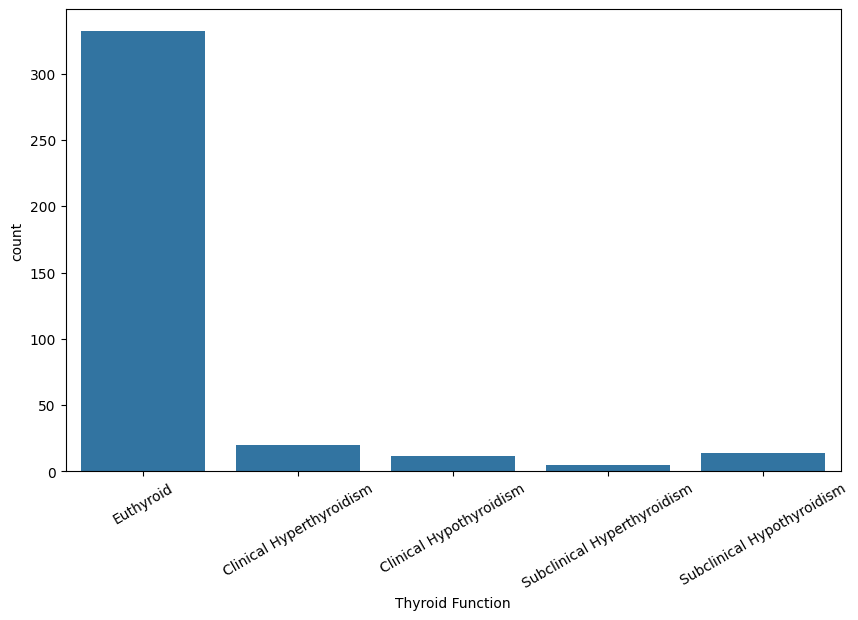

                             Physical Examination  Ratio
Physical Examination                                    
Multinodular goiter                           140 36.554
Single nodular goiter-right                   140 36.554
Single nodular goiter-left                     89 23.238
Normal                                          7  1.828
Diffuse goiter                                  7  1.828


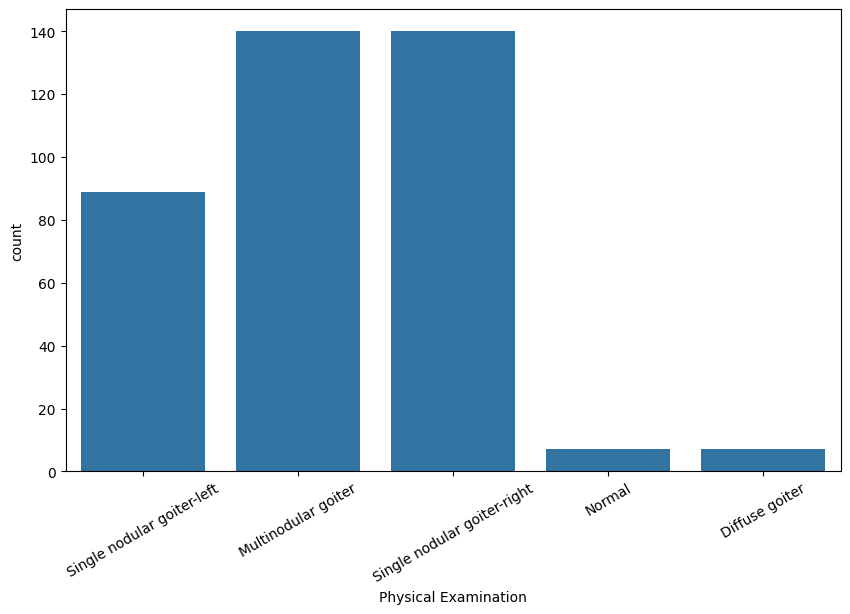

            Adenopathy  Ratio
Adenopathy                   
No                 277 72.324
Right               48 12.533
Bilateral           32  8.355
Left                17  4.439
Extensive            7  1.828
Posterior            2  0.522


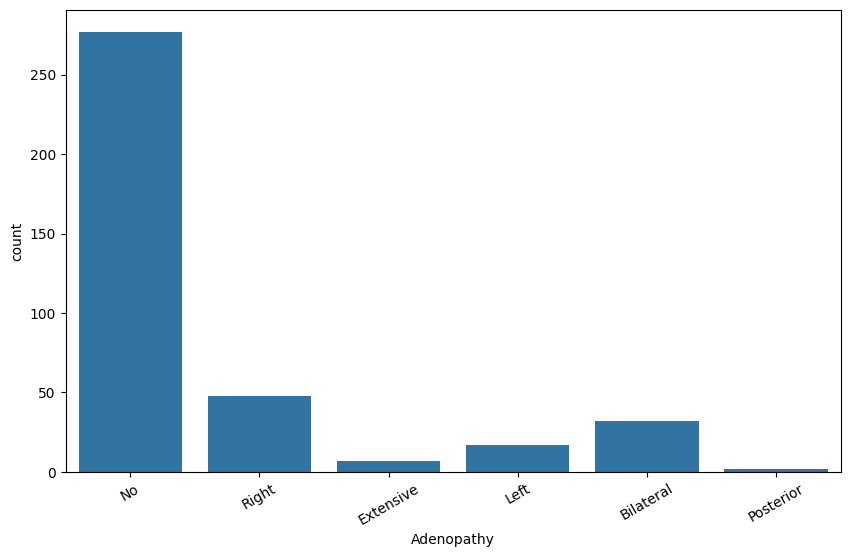

                Pathology  Ratio
Pathology                       
Papillary             287 74.935
Micropapillary         48 12.533
Follicular             28  7.311
Hurthel cell           20  5.222


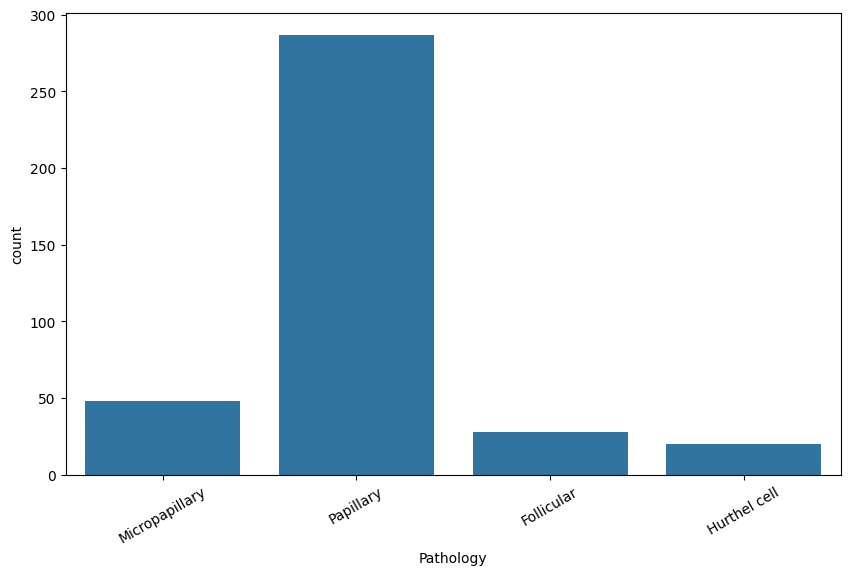

             Focality  Ratio
Focality                    
Uni-Focal         247 64.491
Multi-Focal       136 35.509


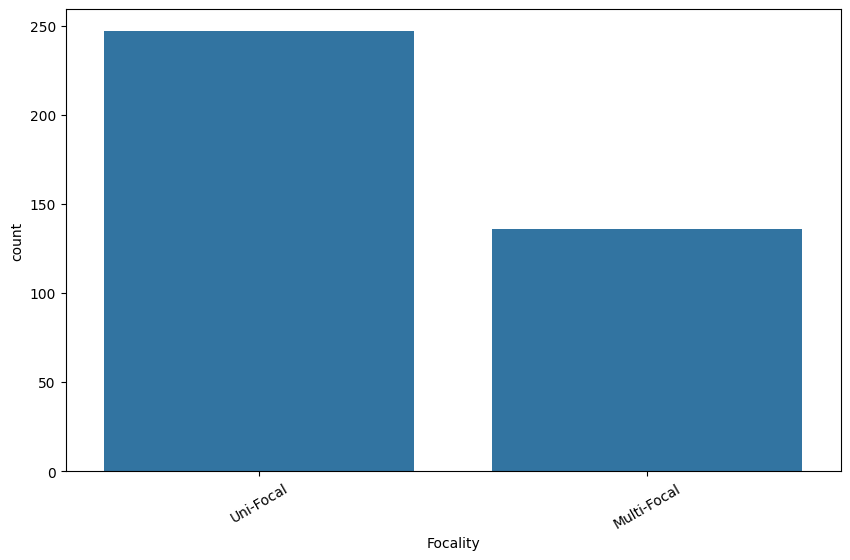

              Risk  Ratio
Risk                     
Low            249 65.013
Intermediate   102 26.632
High            32  8.355


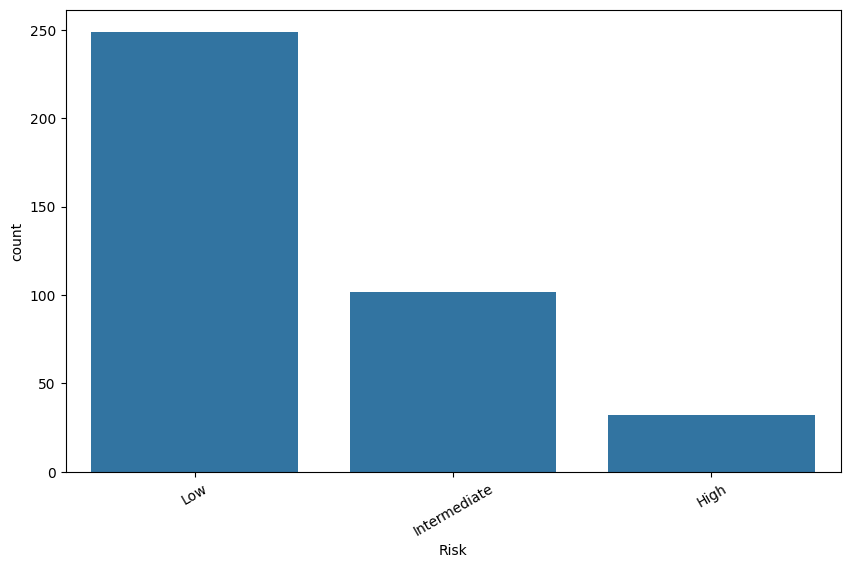

       Stage  Ratio
Stage              
I        333 86.945
II        32  8.355
IVB       11  2.872
III        4  1.044
IVA        3  0.783


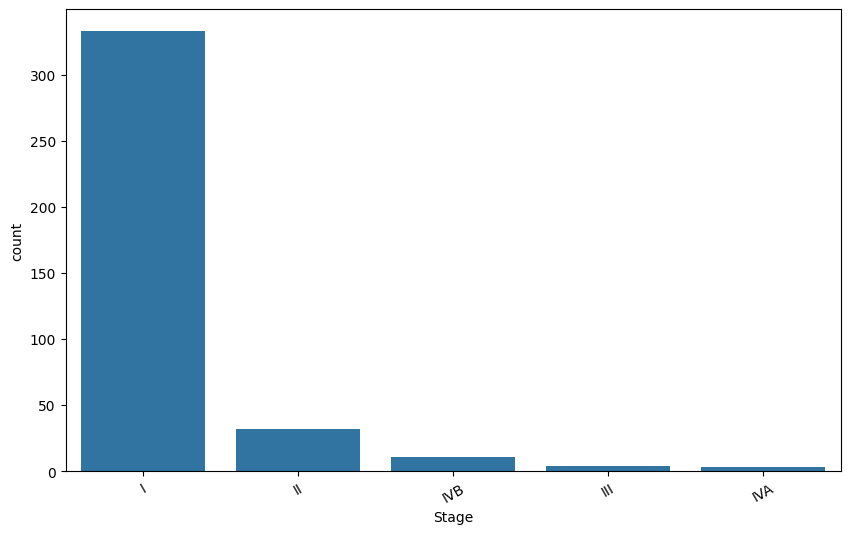

                        Response  Ratio
Response                               
Excellent                    208 54.308
Structural Incomplete         91 23.760
Indeterminate                 61 15.927
Biochemical Incomplete        23  6.005


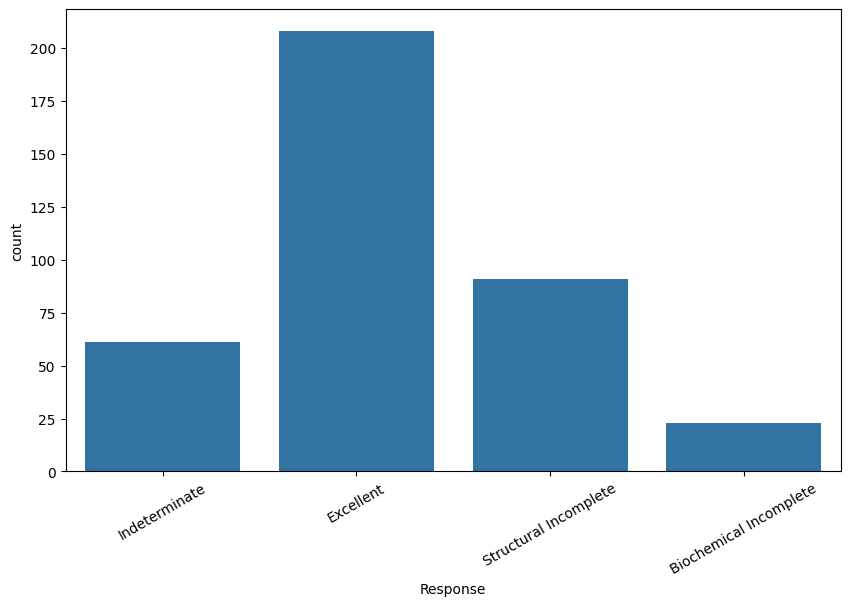

          Recurred  Ratio
Recurred                 
No             275 71.802
Yes            108 28.198


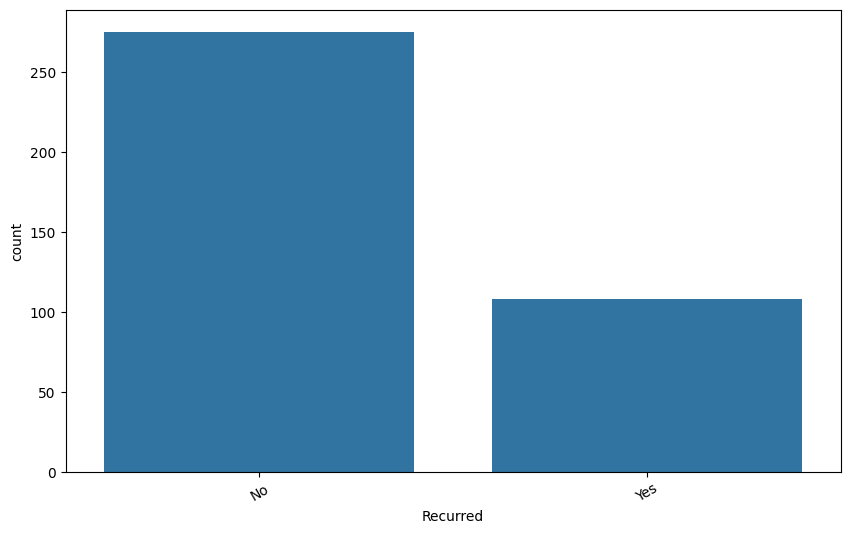

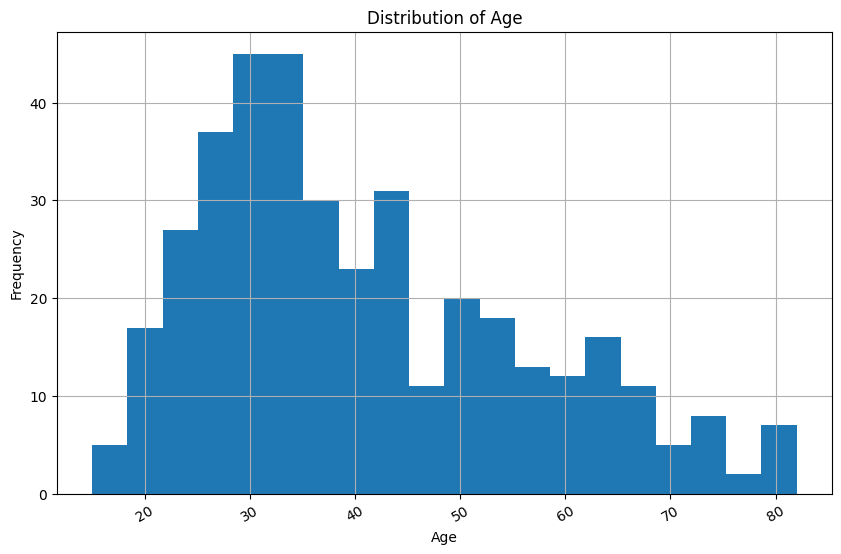

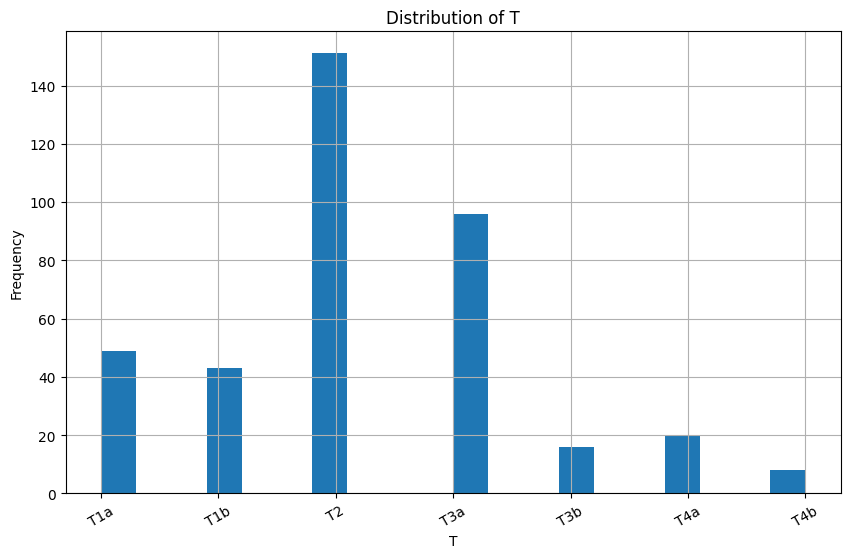

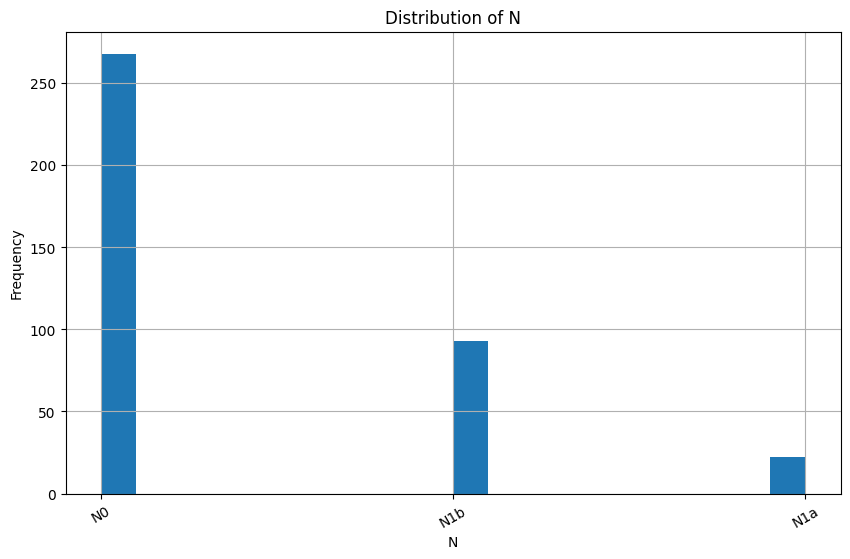

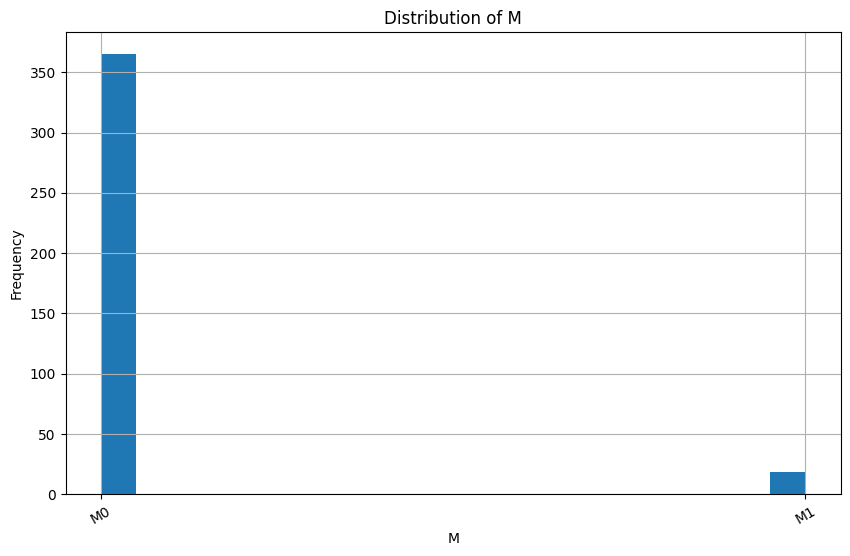

In [48]:
def cat_summary(dataframe, col_name, plot=True):
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print(summary_df)

    if plot:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation=30)  # x ekseni etiketlerini 45 derece döndürme
        plt.show()

def hist_num_columns_show(dataframe, num_column):
    plt.figure(figsize=(10, 6))
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.title(f'Distribution of {num_column}')
    plt.xticks(rotation=30)  # x ekseni etiketlerini 45 derece döndürme
    plt.show()

cat_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'Stage', 'Response', 'Recurred']
for col in cat_cols:
    cat_summary(df, col)

num_cols1 = ['Age', 'T', 'N', 'M']
for num_col in num_cols1:
    hist_num_columns_show(df, num_col)


## Data Visualization 📊4️⃣


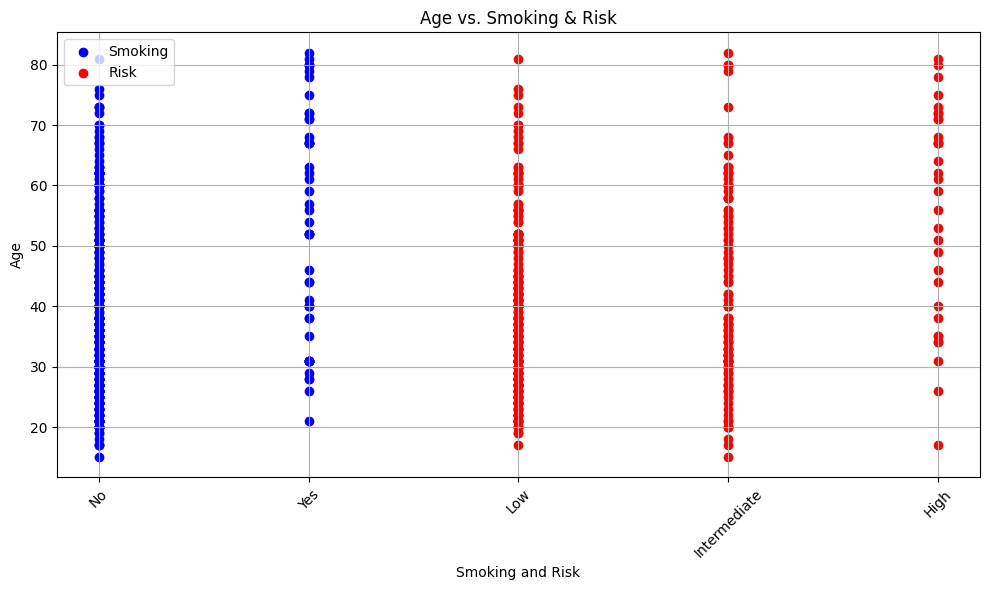

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Smoking'], df['Age'], c='blue', label='Smoking')
plt.scatter(df['Risk'], df['Age'], c='red', label='Risk')
plt.xlabel('Smoking and Risk')
plt.ylabel('Age')
plt.title('Age vs. Smoking & Risk')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<ipython-input-43-c12d5e034a5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Risk', data=df, palette='coolwarm')


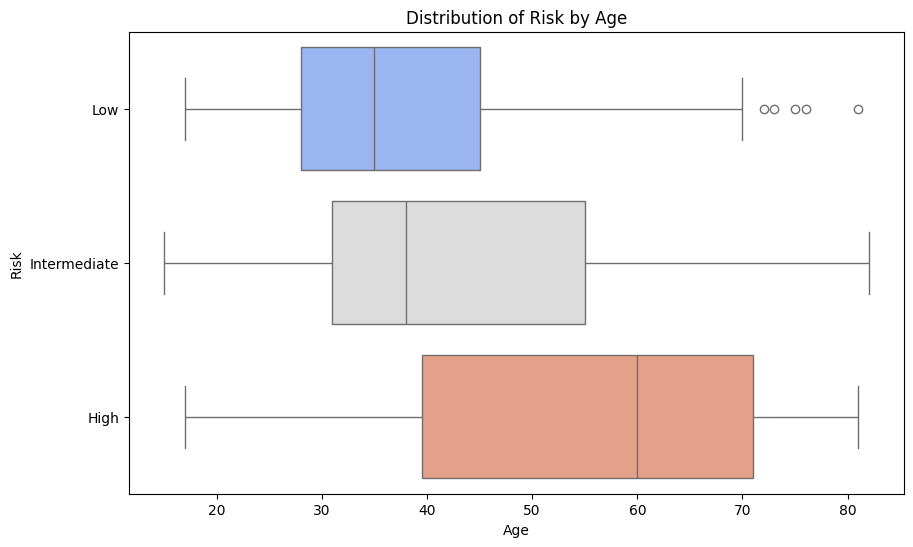

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Risk', data=df, palette='coolwarm')

plt.xlabel("Age")
plt.ylabel("Risk")
plt.title("Distribution of Risk by Age")

plt.show()

In [66]:
crosstab = pd.crosstab(df['Gender'], df['Adenopathy'])

chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-kare değeri:", chi2)
print("p-değeri:", p)
print("Serbestlik derecesi:", dof)

Chi-kare değeri: 38.79321821916358
p-değeri: 2.6136403904857686e-07
Serbestlik derecesi: 5
Beklenen frekanslar:


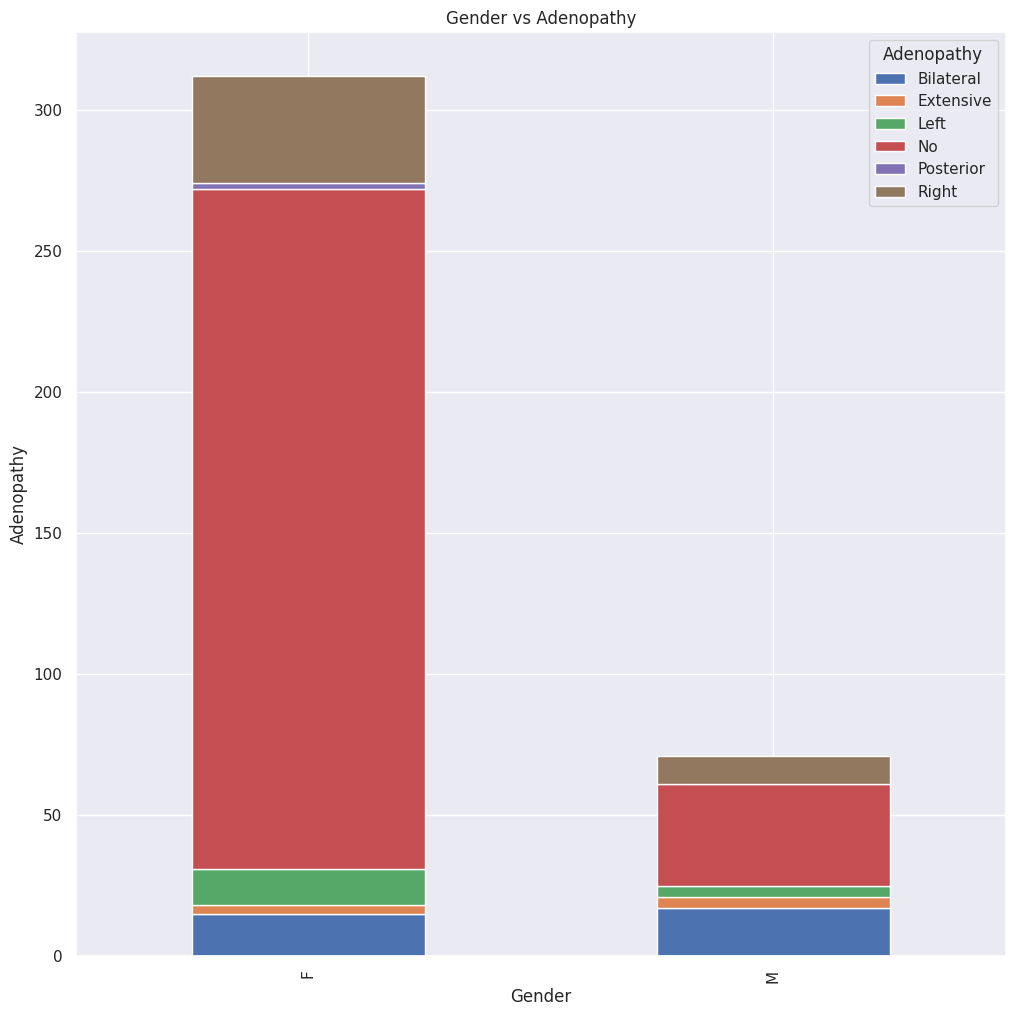

In [67]:
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Adenopathy')
plt.title('Gender vs Adenopathy')
plt.show()

In [68]:
crosstab = pd.crosstab(df['Physical Examination'], df['Risk'])

chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-kare değeri:", chi2)
print("p-değeri:", p)
print("Serbestlik derecesi:", dof)

Chi-kare değeri: 24.80517071117062
p-değeri: 0.0016772125542284216
Serbestlik derecesi: 8


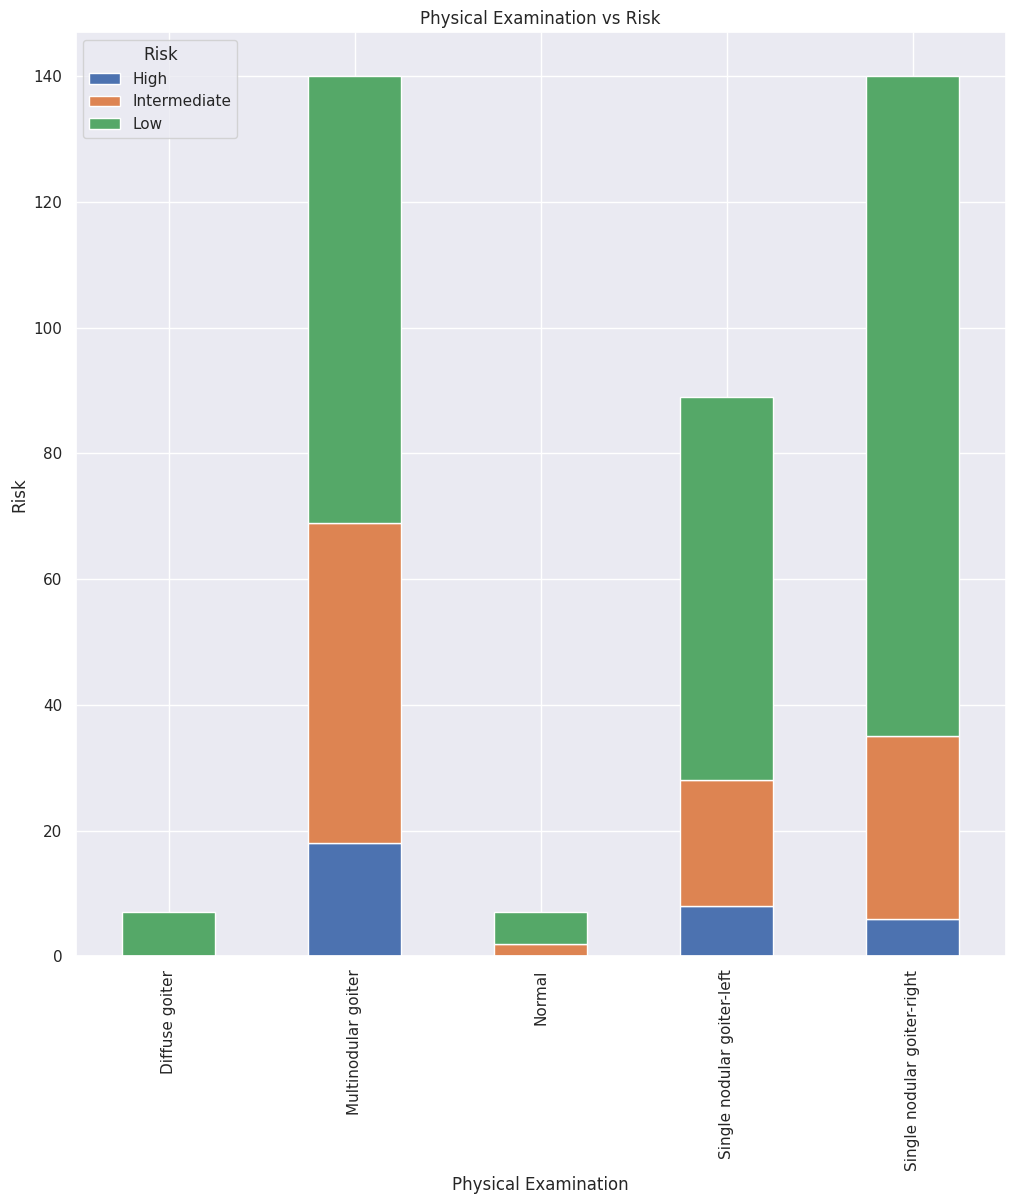

In [69]:
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Physical Examination')
plt.ylabel('Risk')
plt.title('Physical Examination vs Risk')
plt.show()

In [72]:
crosstab = pd.crosstab(df['Age'], df['Risk'])

chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-kare değeri:", chi2)
print("p-değeri:", p)
print("Serbestlik derecesi:", dof)

Chi-kare değeri: 182.22400311846016
p-değeri: 0.0011725687191440149
Serbestlik derecesi: 128


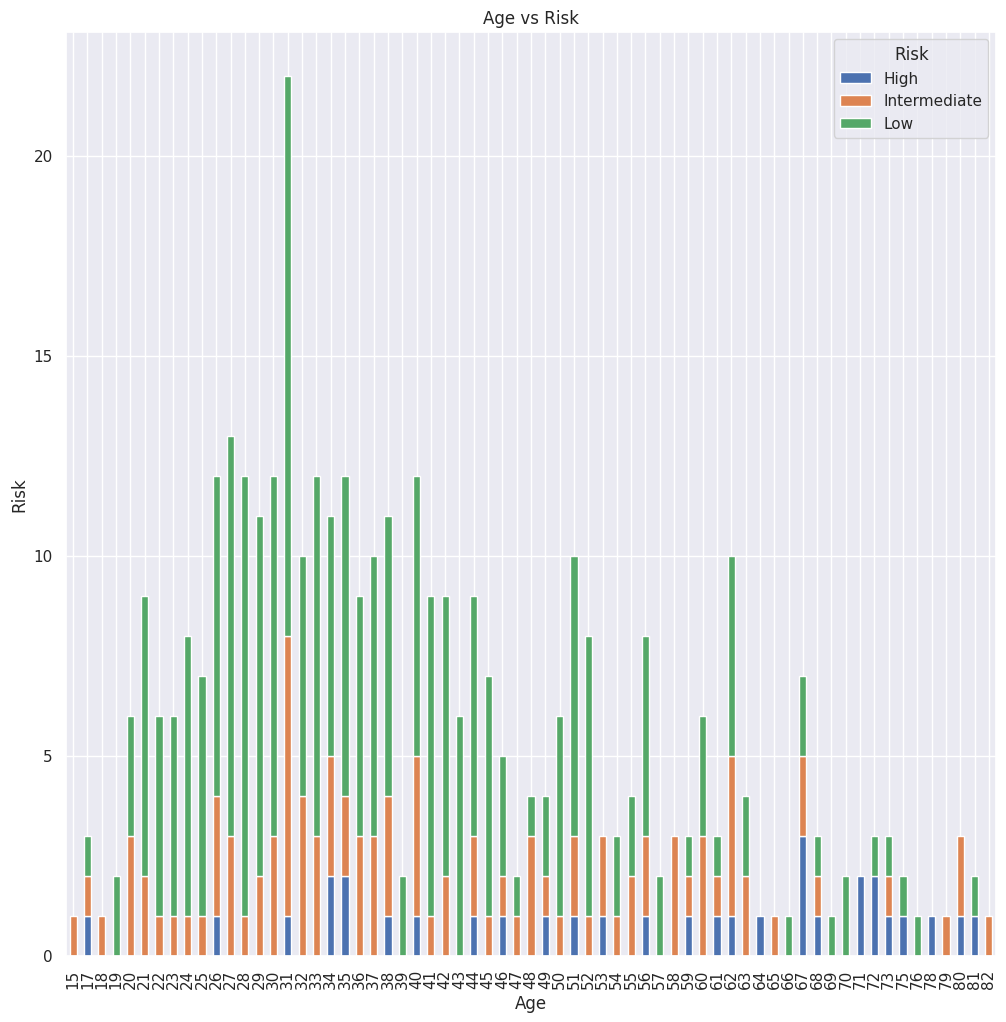

In [73]:
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Risk')
plt.title('Age vs Risk')
plt.show()

## Feature Engineering


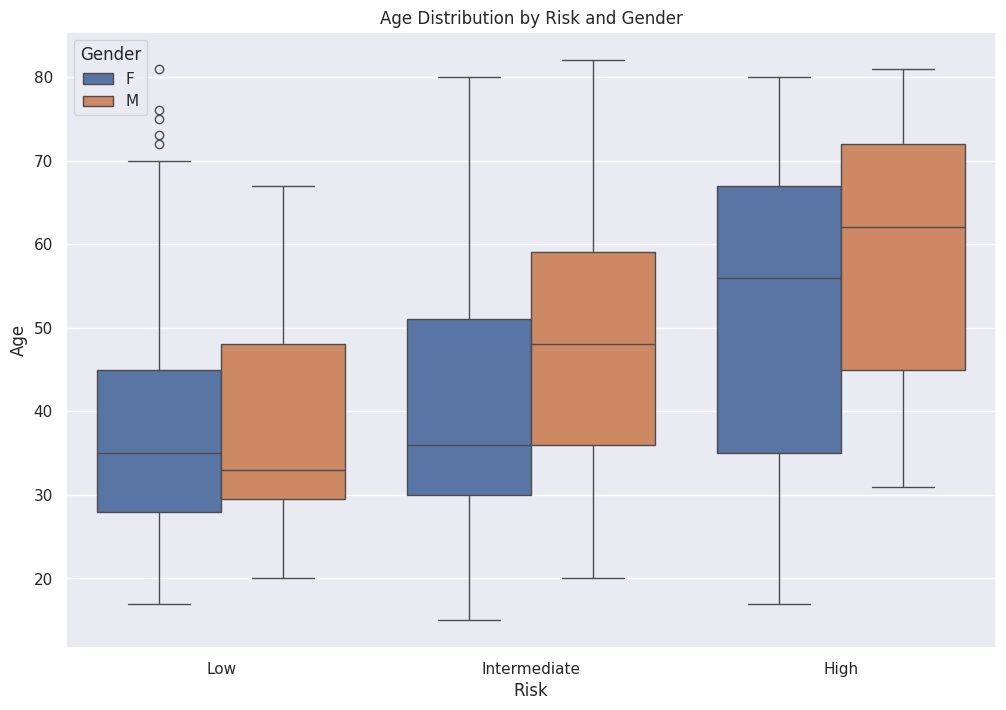

In [82]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Risk', y='Age', data=df, hue='Gender')

plt.xlabel("Risk")
plt.ylabel("Age")
plt.title("Age Distribution by Risk and Gender")

plt.show()

In [103]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low_risk = df[(df['Age'] < lower_bound) & (df['Risk'] == 'Low')]
outliers_high_risk = df[(df['Age'] > upper_bound) & (df['Risk'] == 'High')]

print("Yaş değeri yüksekse risk değeri low olan aykırı değerler:")
print(outliers_low_risk)

print("\nYaş değeri düşükse risk değeri high olan aykırı değerler:")
print(outliers_high_risk)

Yaş değeri yüksekse risk değeri low olan aykırı değerler:
Empty DataFrame
Columns: [Age, Gender, Smoking, Hx Smoking, Hx Radiothreapy, Thyroid Function, Physical Examination, Adenopathy, Pathology, Focality, Risk, T, N, M, Stage, Response, Recurred]
Index: []

Yaş değeri düşükse risk değeri high olan aykırı değerler:
Empty DataFrame
Columns: [Age, Gender, Smoking, Hx Smoking, Hx Radiothreapy, Thyroid Function, Physical Examination, Adenopathy, Pathology, Focality, Risk, T, N, M, Stage, Response, Recurred]
Index: []
